In [1]:
pip install diffusers transformers scipy accelerate 

Note: you may need to restart the kernel to use updated packages.


In [2]:
with open('token.txt') as ifp:
    access_token = ifp.readline()
    print('Read a token of length {}'.format( len(access_token) ))

Read a token of length 37


In [3]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=access_token, device_map="auto", cache_dir="stable_diffusion_cache")
pipe = pipe.to(device)

Fetching 16 files: 100%|████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 99.05it/s]
/opt/conda/lib/python3.7/site-packages/diffusers/utils/deprecation_utils.py:35: FutureWarning: The configuration file of this scheduler: PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.9.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "num_train_timesteps": 1000,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 0,
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull request for the `scheduler/scheduler_config.json` file
  warnings.warn(warning + message, FutureWarning)


In [13]:
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16, revision="fp16")
# pipe = pipe.to("cuda")

Fetching 16 files: 100%|██████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 6979.60it/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [41]:
prompt = "Highly relevant arguments support or deny the safety of vaping and give valid reasons. Relevant arguments argue for or against vaping instead of its safety, vaping only in comparison to smoking, or with respect to health effects of drug addiction (i.e., nicotine)."
image = pipe(prompt)

100%|███████████████████████████████████████████████████████████████████████████████████| 51/51 [00:23<00:00,  2.16it/s]


In [42]:
saveable_image = image.images[0]
saveable_image.save("image_results/topic_generated.png")

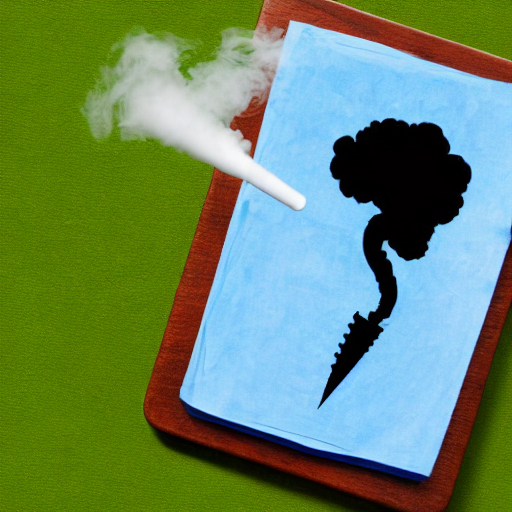

In [43]:
from PIL import Image

image = Image.open("image_results/topic_generated.png")
image.show()